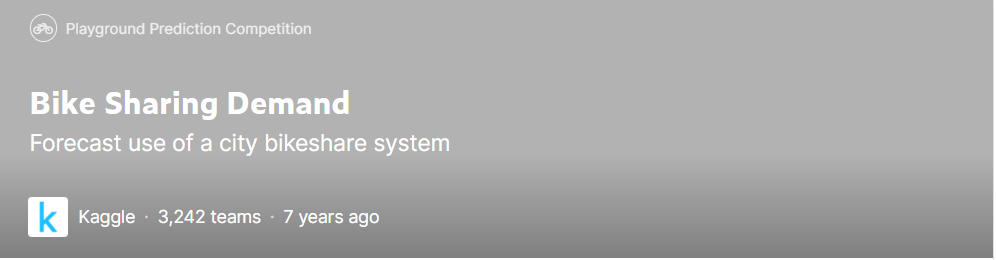
ref) https://www.kaggle.com/c/bike-sharing-demand

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
submission=pd.read_csv('./sampleSubmission.csv')
test=pd.read_csv('./test.csv')
df=pd.read_csv('./train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df.shape

(10886, 12)

### train에만 있는 피쳐 삭제
* test는 타겟피쳐가 없기 때문에 train - 1개 피쳐를 갖는다

### train_test 합치기

In [5]:
df= df.drop(['casual', 'registered'], axis=1)
df.shape, test.shape

((10886, 10), (6493, 9))

In [6]:
train_test = pd.concat([train, test], axis=0)
train_test.shape

(17379, 10)

In [7]:
train_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,16.0
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,40.0
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,32.0
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,13.0
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,1.0


이제 변수명을 train_test()으로 한다. 분리는 밑에서!

### train_test 분리

In [8]:
# train = train_test.iloc[:10886]
# test = train_test.iloc[10886:]
# test = test.drop(['count'], axis=1)
# train.shape, test.shape

In [9]:
# for df in [train,test]:
    

### 날짜타입 변환
- read: 날짜 타입으로 읽어오기
- astype : object > datetime64[ns] 
- to_datetime()

In [10]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')
#test['datetime']=test['datetime'].apply(pd.to_datetime)

#datetime 타입에서 년,월,일,시간 추출
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['weekday']=df['datetime'].dt.dayofweek #0:월, 6:일

# test['year']=test['datetime'].dt.year
# test['month']=test['datetime'].dt.month
# test['day']=test['datetime'].dt.day
# test['hour']=test['datetime'].dt.hour

In [11]:
df.drop('datetime',axis=1,inplace=True)
#drop안하고 set_index함수 쓰는 것 가능,밖으로 꺼낼 땐 reset_index

### EDA
https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

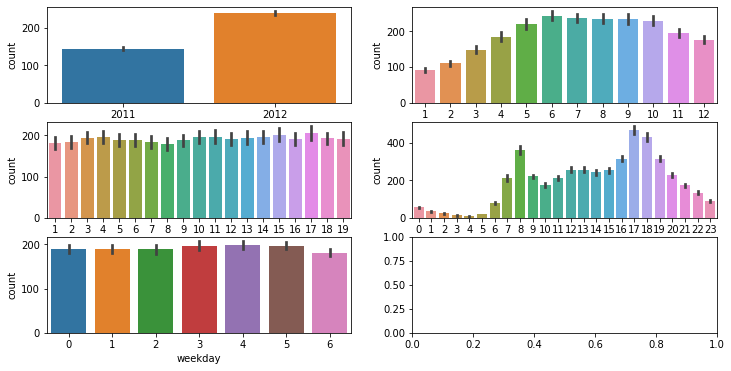

In [12]:
p,axes = plt.subplots(3,2,figsize=(12,6))
#sns.countplot(data=df,x='year')
sns.barplot(x='year',y='count',data=df,ax=axes[0][0])
sns.barplot(x='month',y='count',data=df,ax=axes[0][1])
sns.barplot(x='day',y='count',data=df,ax=axes[1][0])
sns.barplot(x='hour',y='count',data=df,ax=axes[1][1])
sns.barplot(x='weekday',y='count',data=df,ax=axes[2][0])
plt.show()

* 주말 ~ 평일 : 차이 무의미하다
* 날씨 : 5월 ~ 10월
* 시간 : 7 ~ 9시 , 17 ~ 18시  --> 출퇴근,통학용 주로 이용될 듯 하다.

<pre>  
평일/휴일
    'holiday', 'workingday' 

계절
    'season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed'

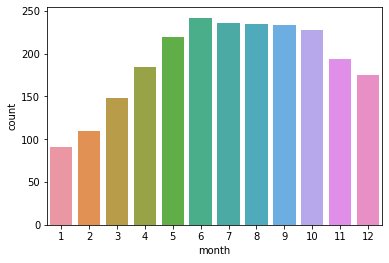

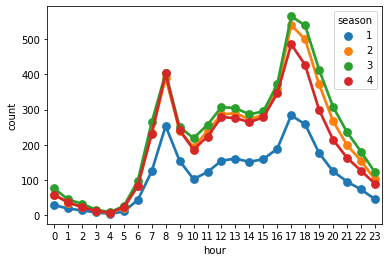

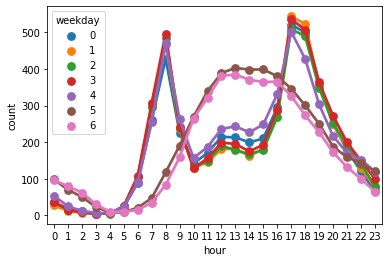

In [13]:
mm=pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
ms=mm.sort_values(by='count',ascending=False)
sns.barplot(data=ms,x="month",y="count")
plt.show()

hh=pd.DataFrame(df.groupby(["hour","season"],sort=True)['count'].mean()).reset_index()
sns.pointplot(data=hh,x='hour',y='count',hue="season",join=True)
plt.show()

ww=pd.DataFrame(df.groupby(["hour","weekday"],sort=True)['count'].mean()).reset_index()
sns.pointplot(data=ww,x='hour',y='count',hue="weekday",join=True)
plt.show()

##### 'weather','temp','atemp','humidity','windspeed'

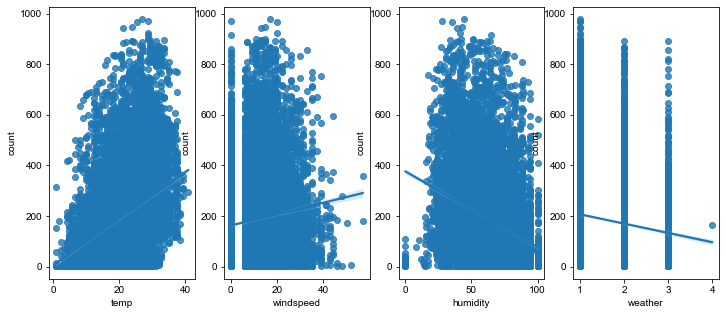

In [14]:
fig,axes = plt.subplots(1,4,figsize=(12,5))
sns.set()
sns.regplot(x="temp", y="count", data=df,ax=axes[0])
sns.regplot(x="windspeed", y="count", data=df,ax=axes[1])
sns.regplot(x="humidity", y="count", data=df,ax=axes[2])
sns.regplot(x="weather",y="count",data=df,ax=axes[3])
plt.show()

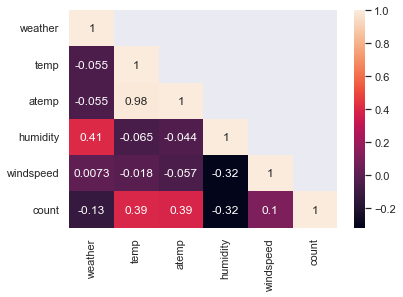

In [15]:
ww = df[['weather','temp','atemp','humidity','windspeed','count']].corr()
mask = np.array(ww)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(ww,annot=True,mask=mask)
plt.show()

-  "atemp" and "temp" has got strong correlation with each other. so that one of them has to be dropped.</br>
- "weather" and "windspeed" have to be considered as they have got leak correlation one another. 

<pre>
* temp    - atemp     : 다중공선                 --> 피쳐 drop
* weather - count     : -0.13 별 관계가 없다      --> weather 4 아웃라이어 처리 안함
* weather - windspeed :  0.10 아무 관계도 아니다  --> 0 데이터 처리 

* weather - humidity  :  0.41 약한 상관관계

In [16]:
df.drop('atemp',axis=1,inplace=True)

##### casual,registered,count

In [17]:
#casual + registerd = count 
#혹시나 해서 casual + registerd != count 찾아봤지만 없었다
df[df['casual']+df['registered']!=df['count']]

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday


In [18]:
df.drop(['casual','registered'],axis=1,inplace=True)

##### 전체 heatmap

<AxesSubplot:>

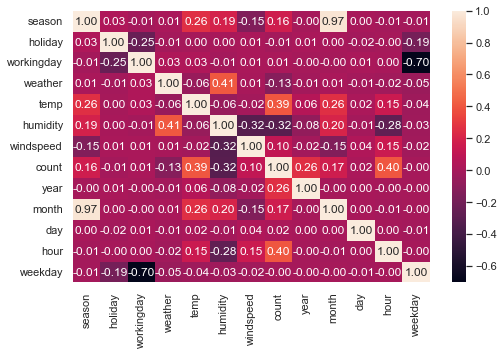

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [20]:
## seanson과 month 둘 중 하나 버려도 된다 (다중공선이기 때문) > 학습 후 결정

### feature engineering

-'windspeed' feature 결측치 채우기
* weather - count     : -0.13 별 관계가 없다
* weather - windspeed :  0.10 아무 관계도 아니다


In [21]:
df['windspeed'].value_counts()  # 0: 1313건

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [22]:
df[df['windspeed']==0].shape,df[df['windspeed']==0].shape[0]/df.shape[0]

((1313, 13), 0.12061363218813155)

In [23]:
df[df['windspeed']!=0].shape

(9573, 13)

In [25]:
from sklearn.ensemble import RandomForestRegressor
col_list=['season','weather', 'temp', 'humidity','year', 'month', 'day', 'hour']

windspped_X_train = df[df['windspeed'] != .0][col_list]        #--9573 .. ~windspped
windspped_y_train = df[df['windspeed'] != .0]['windspeed']     #--9573 ..  windspped
windspped_X_test  = df[df['windspeed'] == .0][col_list] 
# windspped_y_test  = pred
print(windspped_y_train.shape, windspped_X_train.shape)
windspped_X_train.head()

windspped_model = RandomForestRegressor(n_estimators=100, random_state=1234)
windspped_model.fit(windspped_X_train, windspped_y_train)
windspped_pred = windspped_model.predict(windspped_X_test)           #--1313문제
print(windspped_pred[:5],  windspped_pred.shape)                     #--1313 예측답안갯수

#--1313건에 해당하는 0값을 windspped값을 pred    -->   windspped_y_test로 대체
#windspped_y_test['windspped']  = pred.reshape(-1,1)

# train[train['col']>0] = 5                    #error
df.loc[df['windspeed'] == .0 , 'windspeed'] = windspped_pred.reshape(-1,1)


(9573,) (9573, 8)
[11.791665 13.32161  13.161614  9.951644  9.191596] (1313,)


RandomForest를 활용하여 Windspeed값을 부여해보자
하나의 데이터를 Windspeed가 0인 그리고 0이 아닌 데이터프레임으로 분리하고
학습시킬 0이 아닌 데이터 프레임에서는 Windspeed만 담긴 Series와 이외의 학습시킬 column들의 데이터프레임으로 분리한다
학습 시킨 후에 Windspeed가 0인 데이터 프레임에서 학습시킨 컬럼과 같게 추출하여 결과 값을 부여받은 후,
Windspeed가 0인 데이터프레임에 Windspeed값을 부여한다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Windspeed가 0인 데이터프레임
windspeed_0 = df[df.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = df[df.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','count'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','count'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

#모델에 0이 아닌 데이터프레임과 결과값을 학습
rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)

#학습된 모델에 Windspeed가 0인 데이터프레임의 Windspeed를 도출
predicted_windspeed_0 = rf.predict(windspeed_0_df)

#도출된 값을 원래의 데이터프레임에 삽입
windspeed_0['windspeed'] = predicted_windspeed_0

#나눈 데이터 프레임을 원래의 형태로 복원
df = pd.concat([windspeed_0,windspeed_Not0],axis=0)

In [ ]:
sns.scatterplot(x="windspeed", y="count", data=df)
plt.show()

In [ ]:
# 파생변수 , 스케일링 (정규화),왜도/첨도 확인, 이상치 등등 전처리 해야함b

In [ ]:
dfdffddfdfasdf

### 모델 

In [27]:
from sklearn.model_selection import train_test_split

train = train_test.iloc[:10886]
test=train_test.iloc[10886:]
test=test.drop(['count'],axis=1)

X=df[df.columns.difference(['count'])]
y=df['count']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=False)
# 시계열성 데이터이기에 shuffle false

In [28]:
from sklearn.model_selection import train_test_split

train = train_test.iloc[:10886]
test=train_test.iloc[10886:]
test=test.drop(['count'],axis=1)

X=train.drop(['count'],axis=1)
y=train['count']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=False)
# 시계열성 데이터이기에 shuffle false

In [31]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   count       10886 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf=RandomForestRegressor(random_state=0,n_estimators=100)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
rmse = mean_squared_error(y_test,pred,squared=False)
print(rmse)

ValueError: could not convert string to float: '2011-01-01 0:00'

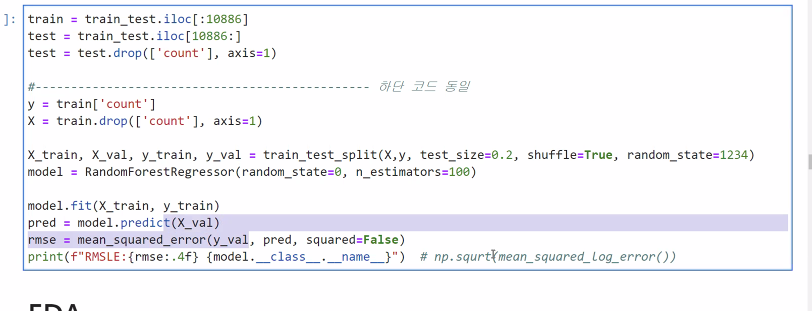
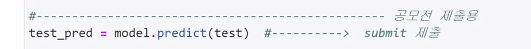
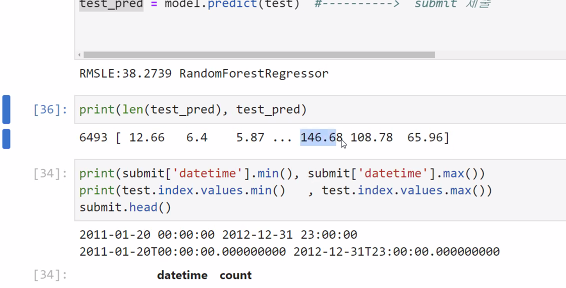
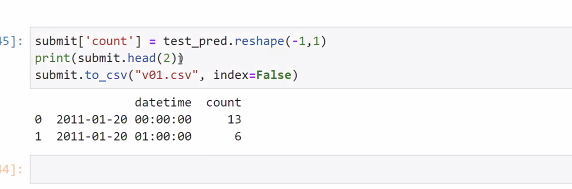